## SOM

In [1]:
from jupyter_code_template import *
def calc_euclid_matrix(map_mat):
    M,N,d = np.shape(map_mat)
    out_mat = np.zeros((M,N))
    euclid_dist_sum = 0
    n = 0
    for j in range(M):
        for k in range(N):
            euclid_dist_sum = 0
            n = 0
            cur_map_vec = map_mat[j,k,:]
            if(j-1>=0):#N
                euclid_dist_sum += norm(cur_map_vec-map_mat[j-1,k,:])
                n +=1
            if(k+1<N):#E
                euclid_dist_sum += norm(cur_map_vec-map_mat[j,k+1,:])
                n +=1
            if(j+1<M):#S
                euclid_dist_sum += norm(cur_map_vec-map_mat[j+1,k,:])
                n +=1
            if(k-1>=0):#W
                euclid_dist_sum += norm(cur_map_vec-map_mat[j,k-1,:])
                n +=1
            
            out_mat[j][k] = euclid_dist_sum/n
    return out_mat

def find_BMU(vec, SOM):
    """
    Traverse map and find BMU
    -vec is the input data_vector
    -SOM is the map
    
    --Returns BMU -the coordinates of the current best matching unit
    """
    temp_min_dist = 1.0e10
    M, N, D = np.shape(SOM)
    for j in range(M):
        for k in range(N):
            cur_dist = norm(vec-SOM[j,k,:])
            # find SOM point with smallest euclidean distance from site
            if(cur_dist<=temp_min_dist):#i
                temp_min_dist = cur_dist
                BMU = [j, k]
    return BMU

def update_SOM(BMU, SOM, cur_range, cur_rate, vec):
    """
    Traverse the map and train map
    -BMU are the coordinates of the current best matching unit
    -SOM is the map
    -cur_range is the current manhatten distance used to limit the update
    -cur_rate is the current learning rate as a function of the number of steps
    -vec is the current input data vector
    
    --Returns updated SOM
    """
    #update SOM vectors
    for j in range(M):
        for k in range(N):
            cur_coord = np.array([j, k])
            theta_i = norm(cur_coord-BMU, 1)#find manhatten distance of current coordiantes from the BMU
            if(theta_i<=cur_range):#if the distance is less than the current range of the neighbourhood function
#                 theta = theta_i/cur_range #generate a fractional learning rate based on distance (monotonic)
                theta = 1#learning rate is only a function of s if with in a certain bound.
                SOM[j,k,:] = SOM[j,k,:]+theta*cur_rate*(vec-SOM[j,k,:])
    return SOM

step: 0
2
step: 100
3
step: 200
4
step: 300
5
step: 400
6
step: 500
7
step: 600
8
step: 700
9
step: 800
10
step: 900
11
Done Training


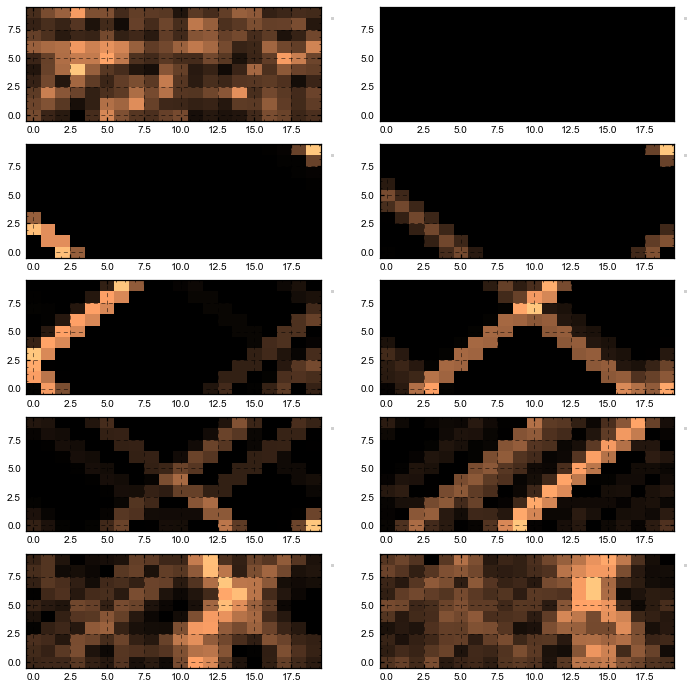

In [2]:
from jupyter_code_template import *
from decimal import Decimal 
np.random.seed(0)
#grid parameters
M = 10
N = 20
lam = 1000 #number of training cycles
range_mx = M+N#maximum range of neighbourhood function
rate_mx = 0.5 #maximum learning rate
N_data = 150 #number of data elements
d = 4 #dimension of each vector
BMU = np.array([0, 0]) #index of best matching unit

data = np.empty((N_data, d+1))

#read data file into data array
file = open('iris_data.txt', 'r')
for i in range(N_data):
    line = file.readline().strip().split(',')
    data[i] = [Decimal(j) for j in line]
file.close()

var_ar = [np.var(data[:,i]) for i in range(5)]
mean_ar =[np.mean(data[:,i]) for i in range(5)]
min_ar = [np.min(data[:,i]) for i in range(5)]
max_ar = [np.max(data[:,i]) for i in range(5)]

#seed map
SOM = np.random.randn(M,N,d)
# SOM = np.random.sample((M,N,d))
# SOM = np.empty((M,N,d))
for i in range(d):
    SOM[:,:,i] = sqrt(var_ar[i])*SOM[:,:,i]+mean_ar[i]
#     SOM[:,:,i] = np.random.uniform(min_ar[i], max_ar[i],size = np.shape(SOM[:,:,i]))

fig, axes  = plt.subplots(5, 2, figsize = (12,12))
plt_count = 1
#train
for s in range(lam):
    left = 1-(s/lam)
    cur_range = int(range_mx*left)+1
#     cur_rate = rate_mx*left# learning rate decreases linearly with number of steps left
    cur_rate = rate_mx*e**(-1*(1-left))# learning rate decreases exponentialy

    #sample input data set randomly
    t = np.random.randint(0, N_data) # input vector index
    data_vector=data[t,0:d] #select random vector
    
    #traverse map and find the best matching unit
    BMU = find_BMU(data_vector, SOM)

    #update SOM vectors
    SOM = update_SOM(BMU,SOM, cur_range, cur_rate, data_vector)
    
    if(s%(lam/10) == 0): 
        print('step:', s)
        display = calc_euclid_matrix(SOM)
        ax = plt.subplot(5,2,plt_count)
        ax.imshow(display, cmap = 'copper')
        ax.legend(["step: {}".format(s)], loc = "upper left", bbox_to_anchor = (1, 1))
        plt_count +=1
        print(plt_count)
        
print("Done Training")
# display = calc_euclid_matrix(SOM)
# fig, ax  = plt.subplots(1, 1, figsize = (6,3))
# ax.imshow(display, cmap = 'RdBu')
foldername = 'images\SOM'
filename = 'SOM_training_test'
save_fig(fig, folder_str = foldername,image_nm = filename, eps = False)

4 4 3


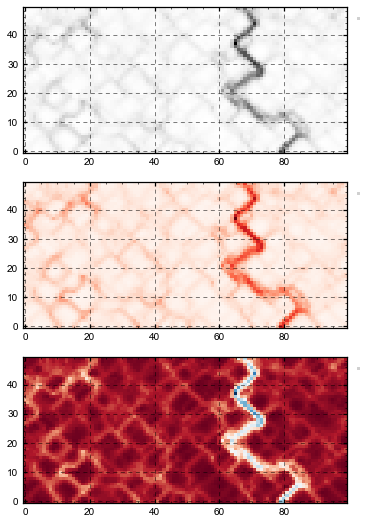

In [43]:
# sequential = [ ]
# sequential2 = []
# Diverging = []
colours = ['Greys','Reds', 'RdBu']
display = calc_euclid_matrix(SOM)

L = len(colours)
fig, axes  = plt.subplots(L, 1, figsize = (6,L*3))
for  i in range(L):
    ax = plt.subplot(L, 1,i+1)
    ax.imshow(display, cmap = colours[i])
    ax.legend(["step: {}".format(s)], loc = "upper left", bbox_to_anchor = (1, 1))
    


# ax.imshow(calc_euclid_matrix(SOM), cmap = 'gray')
# plt.show()
print(len(sequential),len(sequential2), len(Diverging))

In [12]:
def time_str():
    """returns a time string yymmdd_hhmm"""

    # current date and time
    now = datetime.now()

    date = str(datetime.date(now))
    date = date[0:4]+date[5:7]+date[8:10]
    time = str(datetime.time(now))
    time = time[0:2]+time[3:5]+time[6:8]

    return date+'_'+time
print(time_str())

20190501_121815


## SOM

In [ ]:
"""
Daniel Maidment
maidment.daniel@gmail.com
"""
from jupyter_code_template import *

def calc_euclid_matrix(map_mat):
    M,N,d = np.shape(map_mat)
    out_mat = np.zeros((M,N))
    euclid_dist_sum = 0
    n = 0
    for j in range(M):
        for k in range(N):
            euclid_dist_sum = 0
            n = 0
            cur_map_vec = map_mat[j,k,:]
            if(j-1>=0):#N
                euclid_dist_sum += norm(cur_map_vec-map_mat[j-1,k,:])
                n +=1
            if(k+1<N):#E
                euclid_dist_sum += norm(cur_map_vec-map_mat[j,k+1,:])
                n +=1
            if(j+1<M):#S
                euclid_dist_sum += norm(cur_map_vec-map_mat[j+1,k,:])
                n +=1
            if(k-1>=0):#W
                euclid_dist_sum += norm(cur_map_vec-map_mat[j,k-1,:])
                n +=1

            out_mat[j][k] = euclid_dist_sum/n
    return out_mat

In [ ]:
class selfOrganisingMap:
    
    
    def __init__(self, gShape=(10, 10), lam=5000, rate_mx=0.5, fx_seed = True):
        if(fx_seed):np.random.seed(0)
        self.gShape = gShape
        self.M, self.N = self.gShape
        self.lam = lam #number of training cycles
        self.range_mx = M+N#maximum range of neighbourhood function
        self.rate_mx = rate_mx #maximum learning rate
        N_data = 150 #number of data elements
        d = 4 #dimension of each vector

        data = np.empty((N_data, d+1))
    


#read data file into data array
file = open('iris_data.txt', 'r')
for i in range(N_data):
    line = file.readline().strip().split(',')
    data[i] = [float(j) for j in line]
file.close()

var_ar = [np.var(data[:,i]) for i in range(5)]
mean_ar =[np.mean(data[:,i]) for i in range(5)]
min_ar = [np.min(data[:,i]) for i in range(5)]
max_ar = [np.max(data[:,i]) for i in range(5)]

#seed map
# SOM = np.random.randn(M,N,d)
SOM = np.random.sample((M,N,d))
# for i in range(d):
#     SOM[:,:,i] = sqrt(var_ar[i])*SOM[:,:,i]+mean_ar[i]
#     SOM[:,:,i] = np.random.uniform(min_ar[i], max_ar[i],size = np.shape(SOM[:,:,i]))


BMU = np.array([0, 0]) #index of best matching unit
#train
for s in range(lam):
    left = 1-(s*1.0)/lam
    cur_range = int(range_mx*left)+1
    cur_rate = rate_mx*left

    #sample input data randomly
    t = np.random.randint(0, N_data) # input vector index
    data_vector=data[t,0:d] #select random vector
    temp_min_dist = 1.0e10

    #traverse map and find BMU
    for j in range(M):
        for k in range(N):
            cur_dist = norm(data_vector-SOM[j,k,:])
            # find SOM point with smallest euclidean distance from site
            if(cur_dist<=temp_min_dist):#i
                temp_min_dist = cur_dist
                BMU = [j, k]

    #update SOM vectors
    for j in range(M):
        for k in range(N):
            cur_coord = np.array([j, k])
            theta_i = norm(cur_coord-BMU, 1)#find manhatten distance of current coordiantes from the BMU
            if(theta_i<=cur_range):#if the distance is less than the current range of the neighbourhood function
                theta = theta_i/cur_range #generate a fractional learning rate based on distance (monotonic)
                SOM[j,k,:] = SOM[j,k,:]+theta*cur_rate*(data_vector-SOM[j,k,:])

    if(s%(lam/10) == 0): print('step:', s, '\tpercent left:', round(left,3), '\tcurrent rate:',round(cur_rate,3),'\tcurrent range:',round(cur_range,3))

display = calc_euclid_matrix(SOM)
fig, ax  = plt.subplots(figsize = (6,6))
ax.imshow(display, cmap = 'gray')
plt.show()

### Visulising SOM in python

In [41]:
import numpy as np
from scipy import stats
listmap = np.empty((5, 5), dtype = object)
dmap = np.zeros((5, 5), dtype = int)
for i in range(5):
    for j in range(5):
        listmap[i][j] = []
for i in range(5):
    for j in range(5):
        listmap[i][j].append(np.random.randint(1, 4, 2))
        listmap[i][j].append(np.random.randint(1, 4, 2))
        listmap[i][j].append(np.random.randint(1, 4, 2))
for i in range(5):
    for j in range(5):
        dmap[i, j] = stats.mode(listmap[i][j], axis = None)[0]
#         print(stats.mode(listmap[i][j], axis = None)[0])
print(listmap)
print(dmap)

[[list([array([1, 2]), array([3, 1]), array([3, 1])])
  list([array([1, 3]), array([3, 1]), array([1, 2])])
  list([array([1, 1]), array([1, 2]), array([2, 1])])
  list([array([3, 3]), array([1, 3]), array([2, 3])])
  list([array([2, 1]), array([2, 2]), array([1, 2])])]
 [list([array([3, 2]), array([3, 2]), array([1, 2])])
  list([array([1, 3]), array([1, 1]), array([3, 2])])
  list([array([1, 2]), array([3, 1]), array([2, 1])])
  list([array([2, 3]), array([2, 1]), array([3, 2])])
  list([array([3, 2]), array([3, 3]), array([2, 3])])]
 [list([array([3, 3]), array([2, 2]), array([2, 2])])
  list([array([1, 1]), array([1, 1]), array([2, 1])])
  list([array([1, 3]), array([1, 1]), array([3, 2])])
  list([array([2, 2]), array([1, 2]), array([3, 2])])
  list([array([1, 1]), array([2, 3]), array([3, 1])])]
 [list([array([1, 3]), array([2, 3]), array([3, 3])])
  list([array([2, 3]), array([1, 3]), array([3, 3])])
  list([array([1, 2]), array([3, 3]), array([3, 1])])
  list([array([1, 3]), ar

## Test SOM class

0
10
20
30
40
50
60
70
80
90


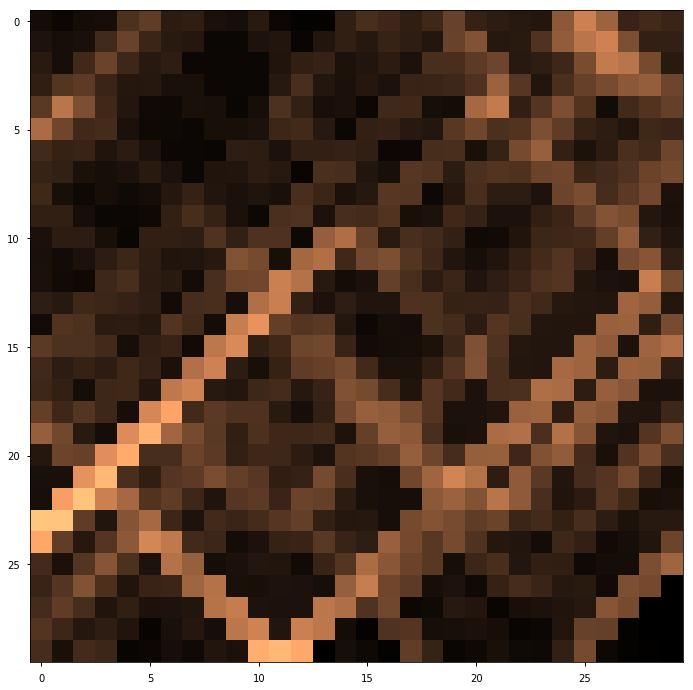

In [43]:
from SelfOrganisingMap import *
plt.style.use('seaborn-notebook')
dataFile = readData('iris_data.txt')

testSOM = selfOrganisingMap( gShape=(30,30), lam = 100, rate_mx = 1.0, data = dataFile, fx_seed = True, debug = True)

testSOM.train()

som_map = testSOM.SOM

U_mat = calc_euclid_matrix(som_map)

fig, ax  = plt.subplots(1,1, figsize = (12,12))
ax.imshow(U_mat, cmap = 'copper')
plt.show()

### Script to generate training data for XOR function.
The XOR function is frequently used to test ML algorithms as it's easy to generate data for, is highly non-linear, and has only two inputs and one output, meaning that the algorithm will be realtively small and easy to debug.

In [47]:
from jupyter_code_template import *
def XOR(x = False, y = False):
    ret_val = False
    if(x and not y):
        ret_val= True
    elif(not x and y):
        ret_val = True
    else:
        ret_val = False
    return ret_val

file = open('xor_data.txt', 'w')

for i in range(1000):
    x = np.random.randint(0, 2, dtype = bool)
    y = np.random.randint(0, 2, dtype = bool)
    file.write("{},{},{}\n".format(int(x), int(y), int(XOR(x, y))))
file.close()

### Testing SOM and clustering techniques on Iris data set.

In [1]:
import SelfOrganisingMap as som
from jupyter_code_template import *

dataFile = som.readData('iris_data.txt')

In [1]:
testSOM = som.selfOrganisingMap(gShape=(30, 30),
                                lam = 2000, rate_mx = 1, 
                                data = dataFile, fx_seed = False,
                                debug = False)

testSOM.train()
som_map = testSOM.SOM
U_mat = som.calc_euclid_matrix(som_map)
display_map = testSOM.visualise_data(n = 3)

Started Training
0
400
800
1200
1600
Finished Training


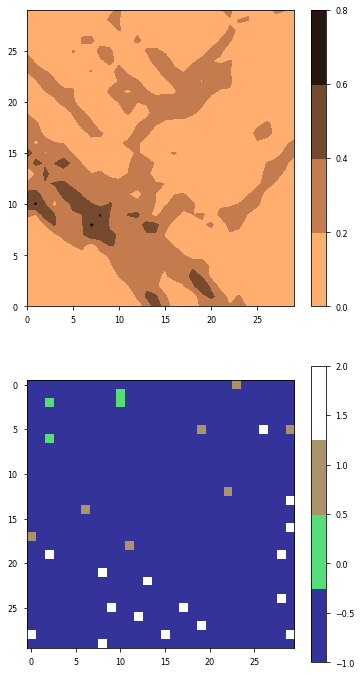

In [32]:
fig, ax  = plt.subplots(2, 1, figsize = (6, 12))
col_map = plt.cm.get_cmap( 'terrain', 4)

im0 = ax[0].contourf(U_mat, levels = 3, cmap = 'copper_r')
fig.colorbar(im0, ax = ax[0])
im1 = ax[1].imshow(display_map, cmap=col_map)
fig.colorbar(im1, ax = ax[1])
plt.show()

#### Attempt SOM with normalised data.

In [73]:
import numpy as np
import SelfOrganisingMap as som
from jupyter_code_template import *

def normalise_data(data):
    """
    Should normalise each feature of 'data' but not the lables.
    Args:
        data [numpy array]: Shape = (number of data points, number of features + integer label).
    """
    shape = np.shape(data)
    norm_data = np.zeros(shape, dtype=float)
    
    mu_arr = np.mean(data[:, 0:shape[1]-1], axis = 0)
    std_arr = np.std(data[:, 0:shape[1]-1], axis = 0)
    
    for j in range(shape[1]-1):
        norm_data[:, j] = (data[:, j]/std_arr[j])-mu_arr[j]

    norm_data[:, -1] = data[:, -1]
    
    return norm_data 

In [20]:
import SelfOrganisingMap as som

dataFile = som.readData('iris_data.txt')
ndataFile = som.normalise_data(dataFile)

# Train SOM using normalised Iris data.
import SelfOrganisingMap as som

testSOM = som.selfOrganisingMap(gShape=(7, 7),
                                lam = 6000, rate_mx = 0.5, 
                                data = ndataFile, fx_seed = False,
                                debug = False)

testSOM.train()
som_map = testSOM.SOM
U_mat = som.calc_euclid_matrix(som_map)

display_map = testSOM.visualise_data(n = 3)

Started Training
0
1200
2400
3600
4800
Finished Training


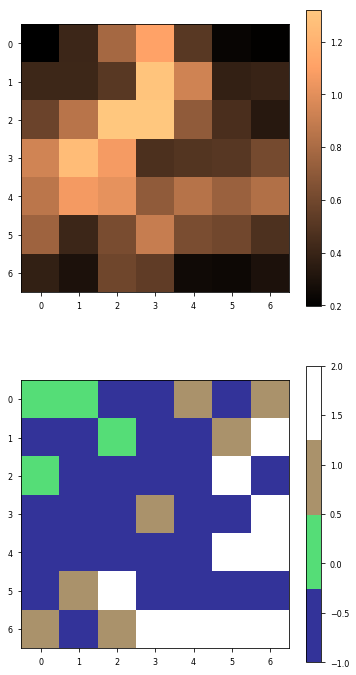

In [21]:
from jupyter_code_template import *
fig, ax  = plt.subplots(2, 1, figsize = (6, 12))
col_map = plt.cm.get_cmap( 'terrain', 4)

# im0 = ax[0].contourf(U_mat, levels = 3, cmap = 'copper_r')
im0 = ax[0].imshow(U_mat, cmap = 'copper')
fig.colorbar(im0, ax = ax[0])
im1 = ax[1].imshow(display_map, cmap=col_map)
fig.colorbar(im1, ax = ax[1])
plt.show()

#### U matrix to data for K means clustering.
The features are the y cooridinates (row number $\in[0,M)$), x coordinate (column number $\in[0,N)$), and the intensity at each cooridinate. Hence the number of data points is equal to MxN.

In [22]:
M = testSOM.M
N = testSOM.N
d = testSOM.d
X = np.zeros((M*N, d+2))
k = 0
for i in range(M):
    for j in range(N):
        X[k, 0] = i
        X[k, 1] = j
        # invert u_matrix to turn minimu into maxima
        X[k, 2:]= som_map[i, j, :]
        k+=1

for k in range(M*N):
    if(k%(M*N/10)==0):
        print(k, X[k, :])

0 [ 0.          0.         -0.33292363  2.7765435  -2.73313555 -0.85091765]


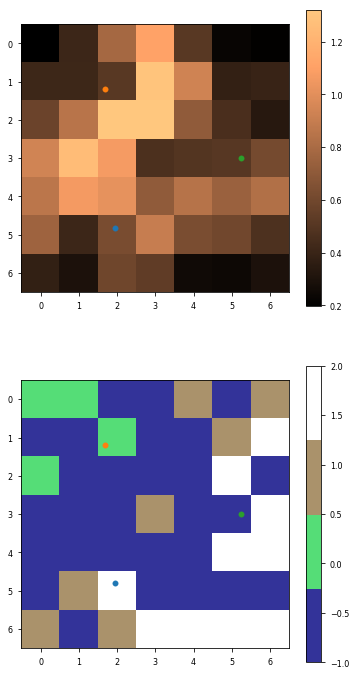

In [23]:
from sklearn.cluster import KMeans
nc = 3
kmeans = KMeans(n_clusters=nc, random_state=None).fit(X)
kmeans.labels_

# kmeans.predict([[15, 2.5, 10], [2.5, 23, 10], [26, 25., 10]])
klu = kmeans.cluster_centers_
# print(klu)

fig, ax = plt.subplots(2, 1, figsize=(6,12))
im0 = ax[0].imshow(U_mat, cmap = 'copper')
fig.colorbar(im0, ax = ax[0])
for i in range(nc):
    ax[0].scatter(klu[i, 0], klu[i, 1])
im1 = ax[1].imshow(display_map, cmap=col_map)
fig.colorbar(im1, ax = ax[1])
for i in range(nc):
    ax[1].scatter(klu[i, 0], klu[i, 1])
plt.show()

### Attempt to implement k-means clustering to visualise SOM clustered data.
k-means will be implemented using sci-kit learn module initially.  
The following example is taken from:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[[1.69229541 2.14478629]
 [7.06205804 6.3278851 ]]


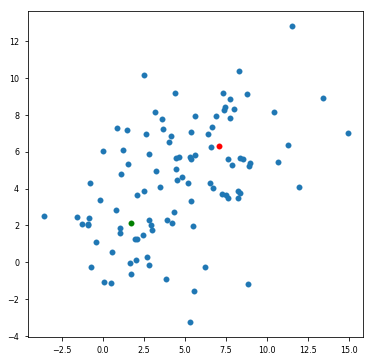

In [29]:
#example adapted from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
from jupyter_code_template import*
X = np.empty((100, 2), dtype = float)
mu_0 = np.random.randint(5, 10)
mu_1 = np.random.randint(0, 5)
for i in range(100):
    flip = np.random.randint(0, 2)
    if(flip==0):
        X[i, :] = mu_0 + 2.5*np.random.randn(1,2)
    else:
        X[i:, :] = mu_1 + 2.5*np.random.randn(1,2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

# kmeans.predict([[0, 0], [12, 3]])

klu = kmeans.cluster_centers_

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X[:,0], X[:,1])
ax.scatter(klu[0, 0], klu[0, 1], c = 'g')
ax.scatter(klu[1, 0], klu[1, 1], c = 'r')
# ax.scatter(klu[2, 0], klu[2, 1], c = 'black')
print(klu)
plt.show()

### How to visualise data:
1. Find peaks using BMU modal clustering or 
2. Draw Gaussian contour around each cluster. (small variance to ensure some contiguity.
3. Find direction of steepest descent for each contour point.
4. Step contour point in that direction.

## Testing external SOM package minisom
https://github.com/JustGlowing/minisom

In [29]:
from jupyter_code_template import *
import SelfOrganisingMap as SOM
import minisom

In [30]:
dataFile = SOM.readData("iris_data.txt")
data = dataFile[:, 0:4]

Training...
 [ 6000 / 6000 ] 100% - 0.00092 it/s - quantization error: 2.1117723108016433

...ready!


c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-packages\minisom.py:367: RuntimeWarning: invalid value encountered in true_divide
  um = um/um.max()


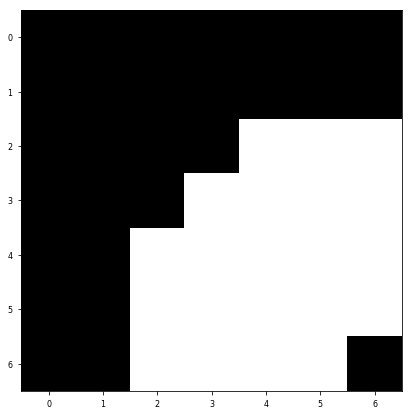

In [34]:
som = minisom.MiniSom(7, 7, 4, sigma=2, learning_rate=0.5, 
              neighborhood_function='mexican_hat', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 6000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.imshow(som.distance_map().T, cmap='copper')  # plotting the distance map as background
#plt.colorbar()
plt.show()

#### Finding an nice decaying asymptotic curve for the learning rate of the SOM.

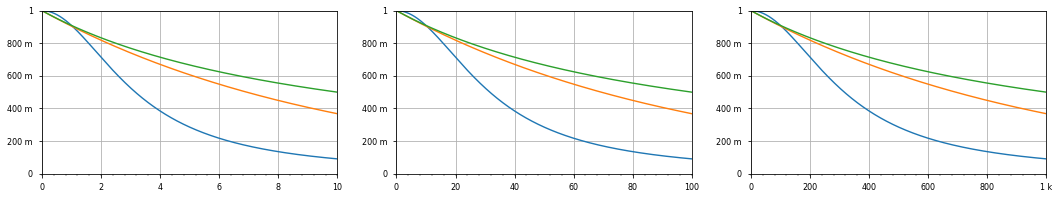

In [43]:
from jupyter_code_template import *
r = 1
c = 3
lam = [10, 100, 1000]
fig, ax = plt.subplots(r,c, figsize = (6*c, 3*r))
for i in range(c):
    s = np.linspace(0, lam[i], lam[i]*100, dtype = float)
    y = 1/(1+100*((s/lam[i])**2))
    ax[i] = config_axis(ax=ax[i], x_lim=(0, lam[i]), X_0=lam[i], y_lim=(0,1))
    ax[i].plot(s, 1/(1+10*((s/lam[i])**2)))
    ax[i].plot(s, 1/(e**(s/lam[i])))
    ax[i].plot(s, 1/(1+s/lam[i]))

plt.show()

### Testing the SOM again
#### Test linear learning function with raw-data

In [162]:
from jupyter_code_template import *
import SelfOrganisingMap as SOM

M=30
N=30
neighbour = "linear"
norm = True
seed = 10
iterations = 3000

dataFile = SOM.readData('iris_data.txt')
if(norm):
    dataFile = SOM.normalise_data(dataFile, False)
    print("Normalised")
testSOM = SOM.selfOrganisingMap(gShape=(M, N),
                            lam=iterations, rate_mx=1, 
                            neighbour=neighbour,
                            data=dataFile, randomseed=seed,
                            debug=True)

testSOM.train()
som_map = testSOM.SOM
U_mat = SOM.calc_euclid_matrix(som_map)

marker_arr = testSOM.get_markers(n = 3)

Normalised
Started Training

Finished Training


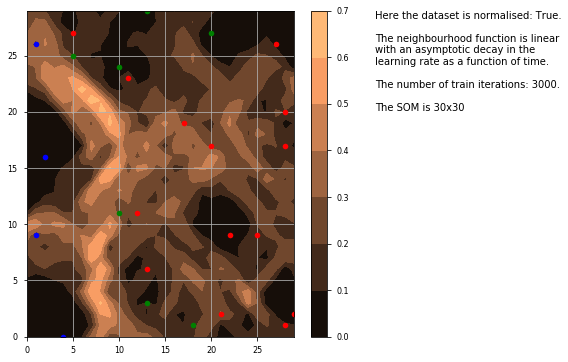

In [163]:
fig, ax  = plt.subplots(1, 1, figsize = (6, 6))

im0 = ax.contourf(U_mat, cmap = 'copper')

for k in range(len(marker_arr)):
    ax.plot(marker_arr[k][0], marker_arr[k][1], marker_arr[k][2])
ax = config_axis(ax=ax, x_lim=(0, testSOM.N-1), y_lim=(0, testSOM.M-1))
fig.colorbar(im0, ax=ax, shrink = 1)
str_label = str("Here the dataset is normalised: {}.\n\n".format(norm)
                +"The neighbourhood function is {}\n".format(neighbour)
                +"with an asymptotic decay in the\n"
                +"learning rate as a function of time.\n\n"
                +"The number of train iterations: {}.\n\n".format(iterations)
                +"The SOM is {}x{}".format(M,N))
ax.text(1.3,1, str_label,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
         )
if(norm):
    name = str("norm_"+ neighbour + "_{}_{}by{}".format(iterations, M, N))
else:
    name = str("raw_"+ neighbour + "_{}_{}by{}".format(iterations, M, N))

save_fig(fig, path = "images\\SOM\\SOM_final_tests", image_nm = name, eps = True)
plt.show()

#### Test linear learning function with normalised data

In [105]:
from jupyter_code_template import *
import SelfOrganisingMap as SOM

dataFile = SOM.readData('iris_data.txt')
dataFile = SOM.normalise_data(dataFile, False)
testSOM = SOM.selfOrganisingMap(gShape=(10, 10),
                            lam=1000, rate_mx=1, 
                            neighbour="linear",
                            data=dataFile, randomseed=10,
                            debug=True)

testSOM.train()
som_map = testSOM.SOM
U_mat = SOM.calc_euclid_matrix(som_map)

marker_arr = testSOM.get_markers(n = 3)

Started Training

Finished Training


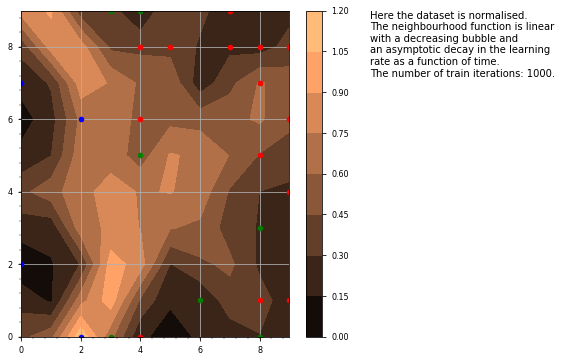

In [106]:
fig, ax  = plt.subplots(1, 1, figsize = (6, 6))

im0 = ax.contourf(U_mat, cmap = 'copper')

for k in range(len(marker_arr)):
    ax.plot(marker_arr[k][0], marker_arr[k][1], marker_arr[k][2])
ax = config_axis(ax=ax, x_lim=(0, testSOM.N-1),X_0=testSOM.N, y_lim=(0, testSOM.M-1), Y_0=testSOM.M)
fig.colorbar(im0, ax=ax, shrink = 1)
str_label = str("Here the dataset is normalised.\n"
                +"The neighbourhood function is linear\n"
                +"with a decreasing bubble and\n"
                +"an asymptotic decay in the learning\n"
                +"rate as a function of time.\n"
                +"The number of train iterations: {}.".format(testSOM.lam))
ax.text(1.3,1, str_label,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
         )
save_fig(fig, path = "images\\SOM", image_nm = "linear_3000_10by10_norm", eps = False)
plt.show()

#### Test linear Gaussian function with raw-data

In [96]:
from jupyter_code_template import *
import SelfOrganisingMap as SOM

dataFile = SOM.readData('iris_data.txt')
# dataFile = SOM.normalise_data(dataFile, False)
testSOM = SOM.selfOrganisingMap(gShape=(10, 10),
                            lam=1000, rate_mx=1, 
                            neighbour="gaussian",
                            data=dataFile, randomseed=10,
                            debug=True)

testSOM.train()
som_map = testSOM.SOM
U_mat = SOM.calc_euclid_matrix(som_map)

marker_arr = testSOM.get_markers(n = 3)

Started Training

Finished Training


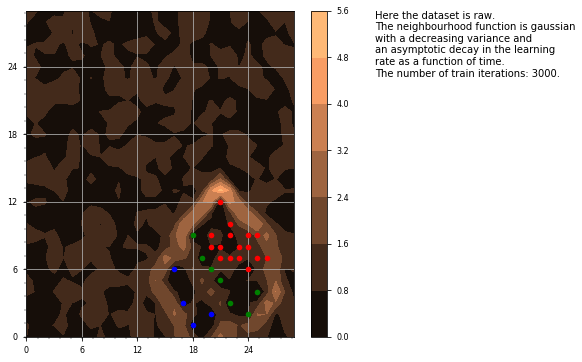

In [99]:
fig, ax  = plt.subplots(1, 1, figsize = (6, 6))

im0 = ax.contourf(U_mat, cmap = 'copper')

for k in range(len(marker_arr)):
    ax.plot(marker_arr[k][0], marker_arr[k][1], marker_arr[k][2])
ax = config_axis(ax=ax, x_lim=(0, testSOM.N-1),X_0=testSOM.N, y_lim=(0, testSOM.M-1), Y_0=testSOM.M)
fig.colorbar(im0, ax=ax, shrink = 1)
str_label = str("Here the dataset is raw.\n"
                +"The neighbourhood function is gaussian\n"
                +"with a decreasing variance and\n"
                +"an asymptotic decay in the learning\n"
                +"rate as a function of time.\n"
                +"The number of train iterations: {}.".format(testSOM.lam))
ax.text(1.3,1, str_label,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
         )
save_fig(fig, path = "images\\SOM", image_nm = "gaussian_3000", eps = True)
plt.show()

#### Test linear Gaussian function with normalised data

In [100]:
from jupyter_code_template import *
import SelfOrganisingMap as SOM

dataFile = SOM.readData('iris_data.txt')
dataFile = SOM.normalise_data(dataFile, False)
testSOM = SOM.selfOrganisingMap(gShape=(30, 30),
                            lam=3000, rate_mx=1, 
                            neighbour="gaussian",
                            data=dataFile, randomseed=10,
                            debug=True)

testSOM.train()
som_map = testSOM.SOM
U_mat = SOM.calc_euclid_matrix(som_map)

marker_arr = testSOM.get_markers(n = 3)

Started Training

Finished Training


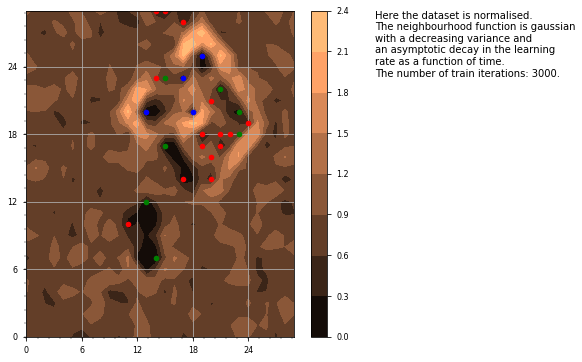

In [102]:
fig, ax  = plt.subplots(1, 1, figsize = (6, 6))

im0 = ax.contourf(U_mat, cmap = 'copper')

for k in range(len(marker_arr)):
    ax.plot(marker_arr[k][0], marker_arr[k][1], marker_arr[k][2])
ax = config_axis(ax=ax, x_lim=(0, testSOM.N-1),X_0=testSOM.N, y_lim=(0, testSOM.M-1), Y_0=testSOM.M)
fig.colorbar(im0, ax=ax, shrink = 1)
str_label = str("Here the dataset is normalised.\n"
                +"The neighbourhood function is gaussian\n"
                +"with a decreasing variance and\n"
                +"an asymptotic decay in the learning\n"
                +"rate as a function of time.\n"
                +"The number of train iterations: {}.".format(testSOM.lam))
ax.text(1.3,1, str_label,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes
         )
save_fig(fig, path = "images\\SOM", image_nm = "gaussian_3000", eps = False)
plt.show()